# Import and installations

In [1]:
import numpy as np
from photonic_func import Photonic 
# Jupyter lab --> not required for Jupyter notebook
# pip install jupyterlab==1.2.0
# jupyter labextension install @jupyterlab/plotly-extension
# jupyter labextension install @jupyterlab/toc  

# Plotly versions keep changing fast
# Plotly version 4.0.0 (pip install plotly==4.0.0)
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)  

# Call photonic class using default config

In [2]:
photonic = Photonic()

In [3]:
dist_vec=np.array([1, 2, 50])
print('------\nDist vector  '+' '.join('{}: {:6.1f} '.format(*k) for k in enumerate(dist_vec)), 'm')
print('wallFlux     '+' '.join('{}: {:6.3f} '.format(*k) for k in enumerate(photonic.wallFlux(dist_vec=dist_vec))), 'W/m**2')
print('siliconFlux  '+' '.join('{}: {:6.4f} '.format(*k) for k in enumerate(photonic.siliconFlux2(dist_vec=dist_vec))), 'W/m**2')
print('Photoelecron '+' '.join('{}: {:6.1f} '.format(*k) for k in enumerate(photonic.photoelectron2(dist_vec=dist_vec))), 'e-')

------
Dist vector  0:    1.0  1:    2.0  2:   50.0  m
wallFlux     0: 17.326  1:  4.331  2:  0.007  W/m**2
siliconFlux  0: 0.4873  1: 0.1218  2: 0.0002  W/m**2
Photoelecron 0:  531.7  1:  132.9  2:    0.2  e-


# Call other config

In [4]:
photonic = Photonic(config='Cfg2')

In [5]:
dist_vec=np.array([1, 2, 5, 50])
print('------\nDist vector  '+' '.join('{}: {:7.1f} '.format(*k) for k in enumerate(dist_vec)), 'm')
print('wallFlux     '+' '.join('{}: {:7.3f} '.format(*k) for k in enumerate(photonic.wallFlux(dist_vec=dist_vec))), 'W/m**2')
print('siliconFlux  '+' '.join('{}: {:7.4f} '.format(*k) for k in enumerate(photonic.siliconFlux2(dist_vec=dist_vec))), 'W/m**2')
print('Photoelecron '+' '.join('{}: {:7.1f} '.format(*k) for k in enumerate(photonic.photoelectron2(dist_vec=dist_vec))), 'e-')

------
Dist vector  0:     1.0  1:     2.0  2:     5.0  3:    50.0  m
wallFlux     0:   8.663  1:   2.166  2:   0.347  3:   0.003  W/m**2
siliconFlux  0:  0.1692  1:  0.0423  2:  0.0068  3:  0.0001  W/m**2
Photoelecron 0: 33079.3  1:  8269.8  2:  1323.2  3:    13.2  e-


# Plots vs. distance

In [6]:
dist_vec = np.array([1,2,5,10,20,50,100])
trace0 = go.Scatter(x=dist_vec,
                    y=1000 * photonic.wallFlux(dist_vec=dist_vec), mode='lines+markers',  # Select 'lines', 'markers' or 'lines+markers'
                    name='wallFlux')
trace1 = go.Scatter(x=dist_vec,
                    y=1000 * photonic.siliconFlux2(dist_vec=dist_vec), mode='lines+markers',
                    name='siliconFlux')
trace2 = go.Scatter(x=dist_vec,
                    y=photonic.photoelectron2(dist_vec=dist_vec), mode='lines+markers',
                    name='photoelectrons')

data = [trace0, trace1, trace2]

layout = {'title': 'Flux on wall/sensor and PE count',
          'xaxis': {'title': 'dist [m]',
                    'type': 'log'},  # Select 'log' or 'linear'
          'yaxis': {'title': 'Flux [mW/m**2], PE [e-]',
                    'type': 'log'},  # Select 'log' or 'linear'
          'template': 'plotly_dark'}

iplot({'data': data, 'layout': layout})

# Light-Shutter convolution

In [7]:
photonic = Photonic(config='Cfg3')
rise = 1e-14
fall = 1e-14
width = 1e-8
y1, t1 = photonic.generate_pulse(rise=rise, fall=fall, width=width, smooth=False)

rise = 1e-14
fall = 1e-14
width = 1e-8
delay = 3e-9
y2, t2 = photonic.generate_pulse(delay=delay, rise=rise, fall=fall, width=width, smooth=False)

y3, t3 = photonic.conv_light_shutter(t_light=t1, y_light=y1, t_shutter=t2, y_shutter=y2)

trace0 = go.Scatter(x=t1,
                    y=y1, mode='lines+markers',  # Select 'lines', 'markers' or 'lines+markers'
                    name='Light')
trace1 = go.Scatter(x=t2,
                    y=y2, mode='lines+markers',
                    name='Shutter')
trace2 = go.Scatter(x=t3-width-2*1e-9,
                    y=y3, mode='lines+markers',
                    name='Conv light-shutter')
trace3 = go.Scatter(x=[-13e-9],
                    y=[0.8], mode='text', textposition='top right',
                    name='text', text=['Convolution is normalized to the light integral' 
                                       + '<br>Equal 1.0 when light fully integrated by the shutter'])

data = [trace0, trace1, trace2, trace3]

layout = {'title': 'Light & Shutter pulses + its Convolution: both square and equal',
          'xaxis': {'title': 'time, time delay [sec]',
                    'type': 'linear'},  # Select 'log' or 'linear'
          'yaxis': {'title': 'Signal',
                    'type': 'linear'},  # Select 'log' or 'linear'
          'template': 'plotly_dark'}

iplot({'data': data, 'layout': layout})

In [8]:
photonic = Photonic(config='Cfg3')
rise = 1e-8
fall = 1e-8
width = 1e-8
y1, t1 = photonic.generate_pulse(rise=rise, fall=fall, width=width, smooth=False)

rise = 1e-14
fall = 1e-14
width = 0.8e-8
delay = 3e-9
y2, t2 = photonic.generate_pulse(delay=delay, rise=rise, fall=fall, width=width, smooth=False)

y3, t3 = photonic.conv_light_shutter(t_light=t1, y_light=y1, t_shutter=t2, y_shutter=y2)

trace0 = go.Scatter(x=t1,
                    y=y1, mode='lines+markers',  # Select 'lines', 'markers' or 'lines+markers'
                    name='Light')
trace1 = go.Scatter(x=t2,
                    y=y2, mode='lines+markers',
                    name='Shutter')
trace2 = go.Scatter(x=t3-width-2*1e-9,
                    y=y3, mode='lines+markers',
                    name='Conv light-shutter')
trace3 = go.Scatter(x=[-10e-9],
                    y=[0.8], mode='text', textposition='top right',
                    name='text', text=['Convolution is normalized to the light integral' 
                                       + '<br>Equal 1.0 when light fully integrated by the shutter'])

data = [trace0, trace1, trace2, trace3]

layout = {'title': 'Light & Shutter pulses + its Convolution: square shutter triangle light',
          'xaxis': {'title': 'time, time delay [sec]',
                    'type': 'linear'},  # Select 'log' or 'linear'
          'yaxis': {'title': 'Signal',
                    'type': 'linear'},  # Select 'log' or 'linear'
          'template': 'plotly_dark'}

iplot({'data': data, 'layout': layout})

## Silicon absoption

In [9]:
import math 
from scipy.integrate import quad
from scipy import interpolate

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [10]:
c = 2.99792458e8  # [m/s] Speed of light
hc = 1.987820871E-025  # [J m / photon] Energy of photon with wavelength m
k_b = 1.3806488e-23 # [J/K] boltzman constant
h   = 6.62606957e-34 # [J*sec] Plank constant
nm = 1e-9 # [m]
cm = 1e-2 # [m]
e_minus =1.60217662e-19  # [Culomb]

qe_ratio_850_940 = 2.477583 # Excel table in https://www.pveducation.org/pvcdrom/materials/optical-properties-of-silicon

In [11]:
# silicon response
silicon_epi_thicness = 10e-4 # [cm]
wavelength = np.linspace(250, 1450, 121)
silicon_absorption = np.array([    # [cm**(-1)]
                      1.84E+06, 1.97E+06, 2.18E+06, 2.36E+06, 2.24E+06, 1.73E+06, 1.44E+06, 1.28E+06, 1.17E+06, 1.09E+06,
                      1.04E+06, 1.02E+06, 6.97E+05, 2.93E+05, 1.50E+05, 9.52E+04, 6.74E+04, 5.00E+04, 3.92E+04, 3.11E+04, 
                      2.55E+04, 2.10E+04, 1.72E+04, 1.48E+04, 1.27E+04, 1.11E+04, 9.70E+03, 8.80E+03, 7.85E+03, 7.05E+03,
                      6.39E+03, 5.78E+03, 5.32E+03, 4.88E+03, 4.49E+03, 4.14E+03, 3.81E+03, 3.52E+03, 3.27E+03, 3.04E+03,
                      2.81E+03, 2.58E+03, 2.38E+03, 2.21E+03, 2.05E+03, 1.90E+03, 1.77E+03, 1.66E+03, 1.54E+03, 1.42E+03,
                      1.30E+03, 1.19E+03, 1.10E+03, 1.01E+03, 9.28E+02, 8.50E+02, 7.75E+02, 7.07E+02, 6.47E+02, 5.91E+02,
                      5.35E+02, 4.80E+02, 4.32E+02, 3.83E+02, 3.43E+02, 3.06E+02, 2.72E+02, 2.40E+02, 2.10E+02, 1.83E+02,
                      1.57E+02, 1.34E+02, 1.14E+02, 9.59E+01, 7.92E+01, 6.40E+01, 5.11E+01, 3.99E+01, 3.02E+01, 2.26E+01,
                      1.63E+01, 1.11E+01, 8.00E+00, 6.20E+00, 4.70E+00, 3.50E+00, 2.70E+00, 2.00E+00, 1.50E+00, 1.00E+00,
                      6.80E-01, 4.20E-01, 2.20E-01, 6.50E-02, 3.60E-02, 2.20E-02, 1.30E-02, 8.20E-03, 4.70E-03, 2.40E-03, 
                      1.00E-03, 3.60E-04, 2.00E-04, 1.20E-04, 7.10E-05, 4.50E-05, 2.70E-05, 1.60E-05, 8.00E-06, 3.50E-06,
                      1.70E-06, 1.00E-06, 6.70E-07, 4.50E-07, 2.50E-07, 2.00E-07, 1.50E-07, 8.50E-08, 7.70E-08, 4.20E-08,
                      3.20E-08]) 
len(wavelength), len(silicon_absorption)
QE = 1.0 - np.exp(-silicon_absorption * silicon_epi_thicness)

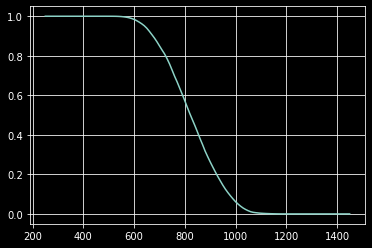

In [12]:
plt.plot(wavelength, QE)
plt.grid()

## Plank function

In [13]:
def PlankLawBlackBodyRad(T, wavelength):
  # Calculates black body radiation according Plank Law. T is the black body
  # temperatue in Kelvin.  Wavelength in Meter. B is the
  # Radiance in [W/sr/m^3]. W is the Spectral radiance in [W/sr/m^2/nm],
  # meaning, the power emitted per unit area of the body, per unit solid
  # angle that the radiation is measured over, per nm of wavelength.
  # 
  # By David Cohen 2009
  # modified to function by DC 14-Jan-2015
  # python - DC 28-Aug-2019

  # Usage:
  # nm      = 1e-9;
  # wavelength  = 850*nm;
  # T = 3200 [K]
  # W       = PlankLawBlackBodyRad(T, wavelength)

  B   = 2 * h * c**2 /  wavelength**5 /(np.exp(hc/(wavelength * k_b * T)) - 1) # [W/sr/m^3] Radiance
  # http://en.wikipedia.org/wiki/Planck%27s_law
  return B * 1e-9 # [W/sr/m^2/nm] Spectral Radiance

In [14]:
#@title IR in daylight - Validation
# !pip install pint
import pint
u = pint.UnitRegistry(system='mks')

if True:
  AmbientLight = 76000*u.lux
  PowerMeter = 14e-3*u.watt/u.centimeter**2
  scene_temp_K = 5000
  bandpass = 200e-9 *u.meter # Hoya R72 Infrared filter
  efficacy = 683*u.lumen/u.watt #550nm
  flux_vis = AmbientLight / (0.5 * efficacy)
  flux_ir = flux_vis * PlankLawBlackBodyRad(scene_temp_K, 820e-9) / PlankLawBlackBodyRad(scene_temp_K, 555e-9) * (bandpass / (700e-9*u.meter - 400e-9*u.meter))
  flux_vis.to(u.watt/u.meter**2), flux_vis.to(u.watt/u.centimeter**2), flux_ir.to(u.watt/u.meter**2), flux_ir.to(u.watt/u.centimeter**2)
  print('Calculated IR flux: %s, \n Measured IR flux: %s'%(flux_ir.to(u.watt/u.centimeter**2), PowerMeter.to(u.watt/u.centimeter**2)))


Calculated IR flux: 0.011551843006578407 watt / centimeter ** 2, 
 Measured IR flux: 0.014 watt / centimeter ** 2


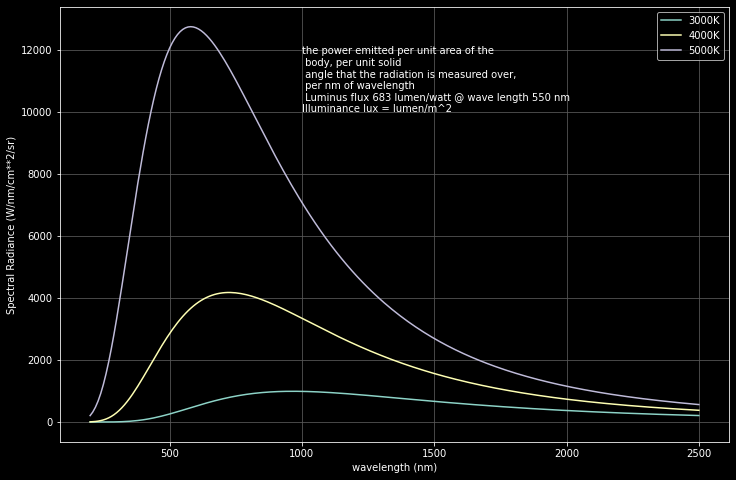

In [15]:
# Test Plank
nm = 1e-9
wl = np.linspace(200, 2500,231)*nm; # [m]
T = np.array([3000, 4000, 5000]) #  [K]

fig, ax = plt.subplots(figsize=(12,8))
for ii in range(len(T)):
  W = PlankLawBlackBodyRad(T[ii], wl) # [W/sr/m**2/nm] Spectral Radiance
  ax.plot(wl/nm , W, label='%0.0fK'%(T[ii]))

ax.grid(True, which="both", ls="-", color='0.35')
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('Spectral Radiance (W/nm/cm**2/sr)')
ax.text(1000,10000,'the power emitted per unit area of the \n body, per unit solid \n angle that the radiation is measured over,\n per nm of wavelength\n Luminus flux 683 lumen/watt @ wave length 550 nm \nIlluminance lux = lumen/m^2')
ax.legend()

### Ambient sunlight validation using Plank

In [16]:
#@title IR in daylight - Validation
# !pip install pint
import pint
u = pint.UnitRegistry(system='mks')
if True:
  AmbientLight = 76000*u.lux
  PowerMeter = 14e-3*u.watt/u.centimeter**2
  scene_temp_K = 5000
  bandpass = 200e-9 *u.meter # Hoya R72 Infrared filter
  efficacy = 683*u.lumen/u.watt #550nm
  flux_vis = AmbientLight / (0.5 * efficacy) # The 0.5 factor reflects the form factor of the spectral 
                                             # distribution of the photopic vision relative 
                                             # to the wavelength of 550 nm
  flux_ir = flux_vis * PlankLawBlackBodyRad(scene_temp_K, 820e-9) / PlankLawBlackBodyRad(scene_temp_K, 555e-9) * (bandpass / (700e-9*u.meter - 400e-9*u.meter))
  flux_vis.to(u.watt/u.meter**2), flux_vis.to(u.watt/u.centimeter**2), flux_ir.to(u.watt/u.meter**2), flux_ir.to(u.watt/u.centimeter**2)
  print('Calculated IR flux: %s, \n Measured IR flux: %s'%(flux_ir.to(u.watt/u.centimeter**2), PowerMeter.to(u.watt/u.centimeter**2)))

Calculated IR flux: 0.011551843006578407 watt / centimeter ** 2, 
 Measured IR flux: 0.014 watt / centimeter ** 2


## Human vision sensitivity

In [17]:
# From Holst G. C. - CCD array cameras and display, 2nd ed., p. 24, JCD
# publishing
wavelength = np.linspace(380, 750, 38);
photopic = np.array([ 0, .00012, 
            .0004, .0012, 0.004, .0116, .023, .038, .06, .091, .139, 
            .208, .323, .503, .71, .862, .954, .995, .995, .952, .87, 
            .757, .631, .503, .381, .265, .175, .107, .061, .032, .017, 
            .0082, .0041, 
            .0021, .00105, .00052, .00025, .00012])
scotopic = np.array([.00059, .00221, 
            .00929, .03484, .0966, .1998, .3281, .455, .567, .676, 
            .793, .904, .982, .997, .935, .811, .65, .481, .3288, 
            .2076, .1212, .0655, .03315, .01593, .00737, .00335, .0015, 
            .00067, .00031, 0, 0, 0, 0, 
            0, 0, 0, 0, 0])
low_wl = 400
high_wl = 700
wl_vec = np.all([[wavelength <=700 ], [wavelength >=400 ]], axis=0)
visible_integral_factor = np.sum(photopic[wl_vec[0]]) / (np.sum(wl_vec) * np.max(photopic))
                           # ratio between integral of photopic respone
                           # to its maximum @ 555 nm  
                           # To convert from lux to W/cm2 ==> divide by
                           # this factor
luminous_efficacy = 683 # [lumen/W] luminous efficacy - (lm/W) @ 555 nm
# photopic, wavelength, len(photopic), len(wavelength), math.pi

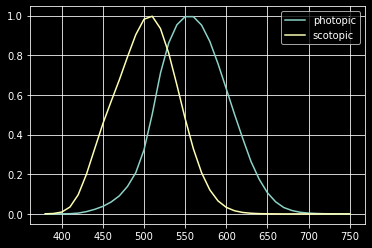

In [18]:
plt.plot(wavelength, photopic, label='photopic')
plt.plot(wavelength, scotopic, label='scotopic')
plt.grid()
plt.legend()

## Solar spectrum

In [19]:
# Absorption @ 940 nm according to "NASA technical
# https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19810016493.pdf
solar_spectrum_radiation_distribution = [0.3138, 11.31, 0.3205, 108.0, 0.3307, 204.7, 0.3409, 276.0, 0.3544, 337.1, 0.3679, 393.2, 
                                         0.3713, 428.8, 0.3883, 469.7, 0.395, 551.1, 0.3984, 647.8, 0.4086, 790.2, 0.4086, 836.0, 
                                         0.4221, 871.7, 0.4323, 866.7, 0.4391, 953.3, 0.4492, 1121, 0.4526, 1187, 0.4594, 1213, 0.4695, 
                                         1228, 0.4797, 1264, 0.4865, 1238, 0.5, 1249, 0.5102, 1229, 0.5169, 1208, 0.5271, 1224, 0.5474, 
                                         1183, 0.5542, 1178, 0.5609, 1168, 0.5711, 1183, 0.5813, 1189, 0.5948, 1179, 0.6151, 1164, 0.6422, 
                                         1154, 0.6591, 1139, 0.6795, 1118, 0.6896, 1103, 0.6998, 1058, 0.7065, 1083, 0.7133, 1068, 0.7167, 
                                         915.4, 0.7180, 1027, 0.7200, 981.5, 0.7203, 747.6, 0.7235, 864.6, 0.7269, 834.2, 0.7302, 869.8, 0.7336, 
                                         946.1, 0.737, 976.6, 0.7506, 997.1, 0.754, 910.7, 0.7573, 854.8, 0.7607, 798.9, 0.7641, 687.1, 0.7675, 
                                         839.6, 0.7709, 961.7, 0.7712, 921.0, 0.781, 956.7, 0.7946, 906.0, 0.8014, 880.7, 0.8110, 870.6, 0.8115, 
                                         784.2, 0.8117, 845.2, 0.8135, 809.6, 0.8149, 758.8, 0.8151, 677.4, 0.8155, 713.0, 0.8160, 733.4, 0.8217, 
                                         713.1, 0.8318, 718.3, 0.8352, 769.2, 0.8386, 799.7, 0.8488, 825.2, 0.8691, 805.1, 0.886, 779.8, 0.8928, 
                                         713.8, 0.8962, 642.7, 0.8995, 581.7, 0.9063, 536.0, 0.9131, 490.3, 0.9165, 531.0, 0.9165, 592.0, 0.9233, 
                                         536.1, 0.9266, 495.5, 0.9266, 429.4, 0.93, 368.4, 0.9334, 276.9, 0.9334, 190.5, 0.9402, 256.7, 0.9436, 282.1, 
                                         0.9537, 251.7, 0.9571, 307.7, 0.9605, 378.9, 0.9639, 450.1, 0.9707, 501.0, 0.9774, 557.0, 0.9842, 618.1, 1.001, 
                                         592.9, 1.025, 552.4, 1.059, 496.8, 1.093, 451.4, 1.099, 466.8, 1.103, 421.0, 1.106, 375.3, 1.109, 334.7, 1.113, 
                                         268.6, 1.12, 172.0, 1.13, 111.1, 1.143, 146.9, 1.16, 253.8, 1.17, 320.0, 1.174, 350.6, 1.187, 360.9, 1.191, 391.4, 
                                         1.218, 361.2, 1.235, 366.4, 1.262, 310.8, 1.279, 321.1, 1.292, 311.1, 1.309, 275.7, 1.319, 224.9, 1.33, 169.1, 1.35, 
                                         113.4, 1.367, 57.61, 1.38, 6.898, 1.428, 32.8, 1.455, 68.67, 1.468, 63.73, 1.489, 109.7, 1.516, 171.0, 1.54, 227.2,
                                         1.567, 217.3, 1.587, 212.4, 1.607, 202.4, 1.628, 202.6, 1.651, 187.6, 1.678, 167.6, 1.702, 162.7, 1.736, 152.9, 
                                         1.773, 132.9, 1.797, 102.7, 1.831, 52.16, 1.858, 11.75, 1.946, 38.07, 1.99, 58.86, 2.014, 74.35, 2.051, 74.73, 
                                         2.088, 75.11, 2.122, 75.46, 2.149, 70.65, 2.22, 71.37, 2.295, 72.13] # Solar Irradiance [W/m ** 2/µm]
solar_spectrum_radiation_distribution = np.reshape(solar_spectrum_radiation_distribution,[len(solar_spectrum_radiation_distribution)//2,2])    
f = interpolate.interp1d(solar_spectrum_radiation_distribution.T[0], solar_spectrum_radiation_distribution.T[1])
wavelength = np.arange(np.min(solar_spectrum_radiation_distribution.T[0]), np.max(solar_spectrum_radiation_distribution.T[0]), 0.001)
low_wl = 0.9
high_wl = 1.0
spectrum = f(wavelength)
wl_vec = np.all([[wavelength <=high_wl ], [wavelength >=low_wl ]], axis=0)

Text(0, 0.5, 'Solar Spectral Irradiance [W/m^2/nm]')

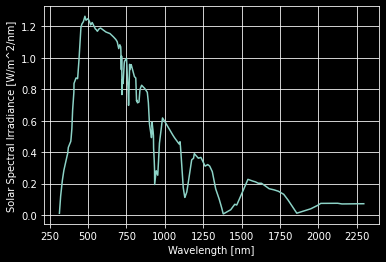

In [20]:
plt.plot(wavelength*1000, spectrum / 1000)
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Solar Spectral Irradiance [W/m^2/nm]')

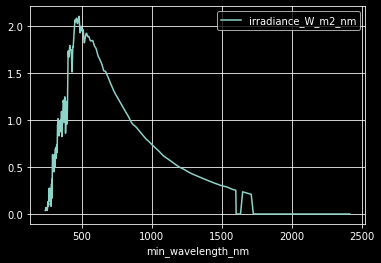

In [21]:
import pandas as pd
df=pd.read_csv('/Users/davidxcohen/repo/imaging/data/sorce_sim_L3_c24h_0240nm_2413nm_20030414_20200225.txt',
            header=68, delimiter='\s+', usecols=[2,6],
            names=['time [day]', 'timestamp', 'min_wavelength_nm', 'max_wavelength_nm', 'e','f','irradiance_W_m2_nm', 'h','i'])
# print(df.loc[997], '\n', df.loc[1170])
df.plot(x='min_wavelength_nm', y='irradiance_W_m2_nm', grid=True)

### Ambient sunlight validation using Plank

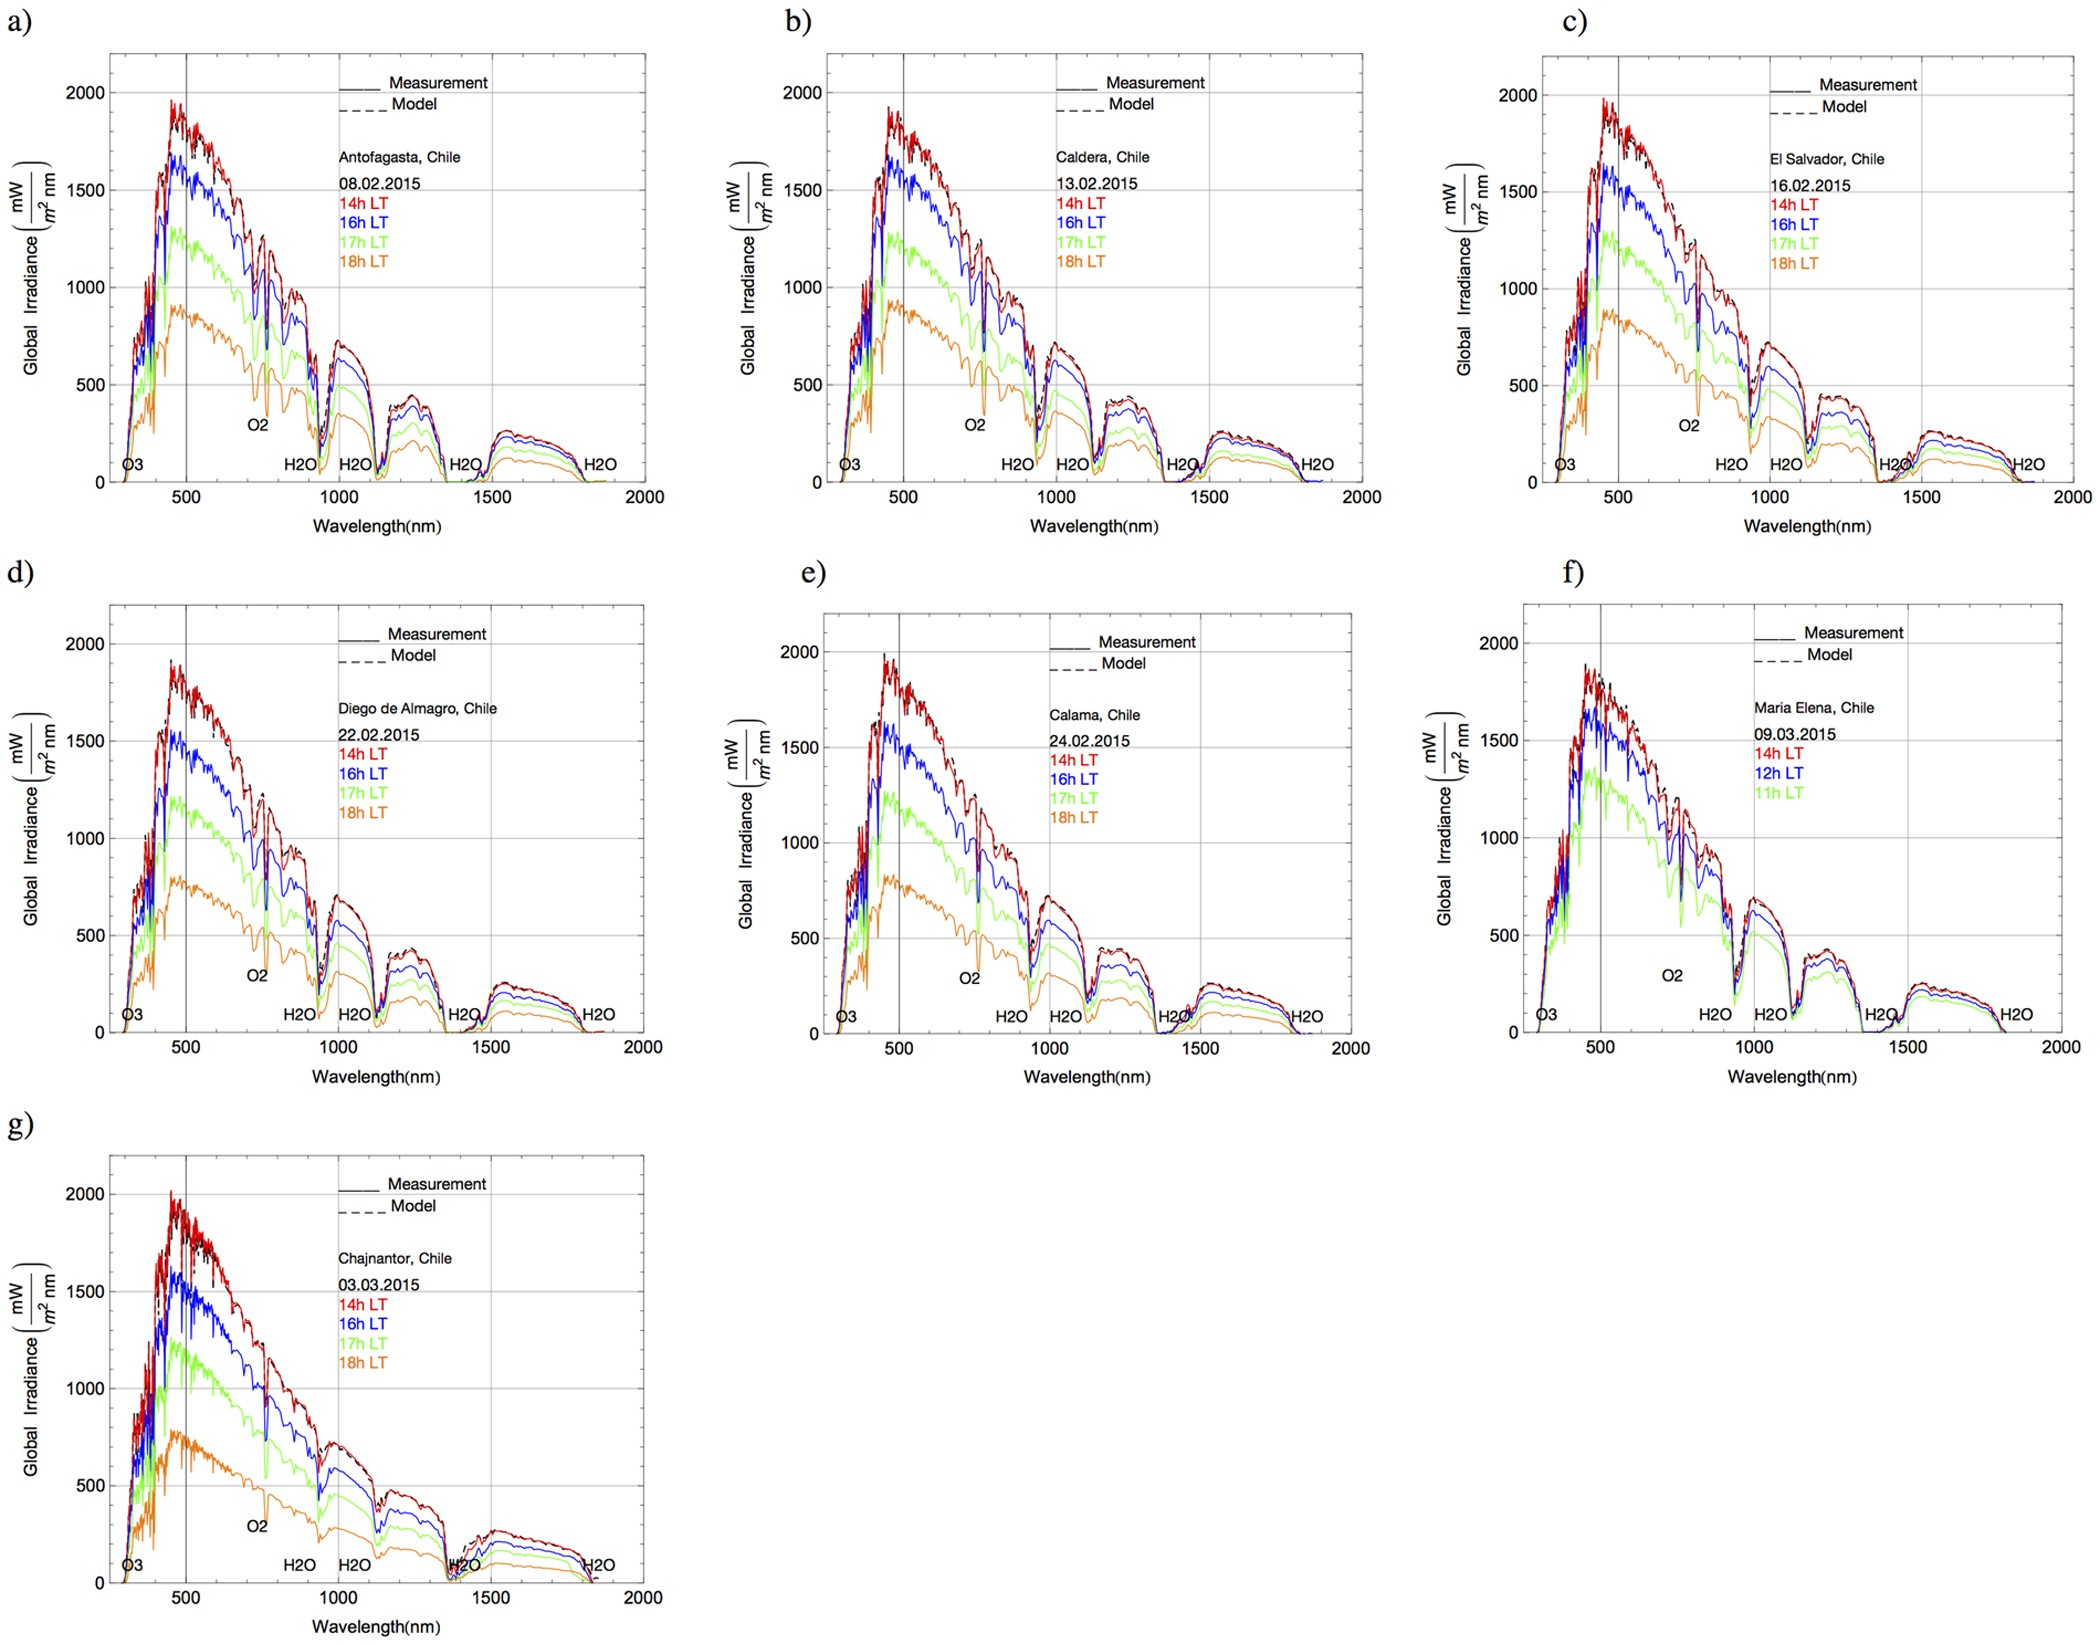

In [22]:
from IPython.core.display import Image, display
# display(Image('https://www.nature.com/articles/srep22457/figures/2/srep22457-f2.jpg', width=1900, unconfined=True))
display(Image('https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fsrep22457/MediaObjects/41598_2016_Article_BFsrep22457_Fig2_HTML.jpg', width=1900, unconfined=True))

/Users/davidxcohen/repo/imaging/func/photonic_func.py:136: RuntimeWarning:

invalid value encountered in true_divide

/Users/davidxcohen/repo/imaging/func/photonic_func.py:150: RuntimeWarning:

invalid value encountered in less



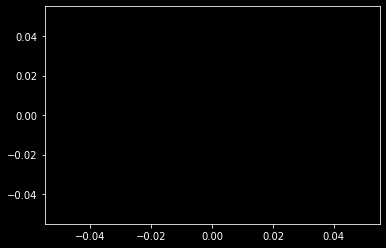

In [23]:
rise = 1e-12
fall = 1e-12
width = 1e-10
y1, t1 = photonic.generate_pulse(rise=rise, fall=fall, width=width, smooth=True)

rise = 1e-12
fall = 1e-12
width = 1e-10
y2, t2 = photonic.generate_pulse(rise=rise, fall=fall, width=width, smooth=True)

y3, t3 = photonic.conv_light_shutter(t_light=t1, y_light=y1, t_shutter=t2, y_shutter=y2)
import matplotlib.pyplot as plt
plt.plot(t1,y1)
plt.plot(t2,y2)
plt.plot(t3, y3)
plt.show()

## SWIR Plasmonic detector

Source:
https://www.osapublishing.org/DirectPDFAccess/D22B30CA-F393-324D-BBBBB21501A43B3A_431117/optica-7-5-371.pdf?da=1&id=431117&seq=0&mobile=no

Quantum efficiency calculations:

$$
Q\!E=f\!f \cdot \frac{R}{e^{-}}\cdot \frac{hc}{\lambda}
 \qquad
[1]\cdot\frac{[C]/[sec]}{[J]/[sec]\cdot[C]}\cdot\frac{[J][m]}{[m]}
$$


Where $Q\!E$ is the quantum efficiency, $R$ is the resposivity in $\frac{A}{W}$, $\lambda$ is the wave length of the light in $m$, $f\!f$ is the fill factor of the pixel, $hc = 1.987820871\cdot10^{-25}J\ m$ and $e^-=1.60217662\cdot10^{-19}C$ is the electron charge.

As a comparison InGaAs detector describe on https://www.thorlabs.com/drawings/fd2312e5f41844ae-F33830DC-B323-A883-B47E9DF66FFEBD03/FGA21-SpecSheet.pdf is shown.

In [41]:
wavelength_m = np.array([1304, 1550, 1550]) * 1e-9 # [m]
responsivity = np.array([0.0045, 0.002, 1.04])  # [A/W]
photonic = Photonic()

tmp = photonic.qe_by_responsivity(silicon_responsivity_a_w=responsivity, pixel_fill_factor=1., wavelength_m=wavelength_m)
print('The QE of the plasmonic detector in this article at %3.0fnm is %2.2f%% and at %3.0fnm is %2.2f%%'%(wavelength_m[0]*1e9, tmp[0]*100, wavelength_m[1]*1e9, tmp[1]*100))
print('InGaAs detector QE at %3.0fnm is %2.1f%%'%(wavelength_m[2]*1e9, tmp[2]*100))

The QE of the plasmonic detector in this article at 1304nm is 0.43% and at 1550nm is 0.16%
InGaAs detector QE at 1550nm is 83.2%


# SWIR light sources efficiency
Examples:
LED source data from:
https://www.hamamatsu.com/resources/pdf/ssd/l12509_series_kled1071e.pdf
P/N = L12509-0155K 

Laser Diode source data from:
https://www.thorlabs.com/drawings/471c86010a0aa6dc-F53DE964-0AE3-E9AF-406B86F1AA7C426E/L1550G1-SpecSheet.pdf
P/N = L1550G1

In [68]:
from light_module_efficiency import light_efficiency

if True:
    light_type = 'Thorlabs Laser Diode L1550G1'
    I = np.array([0.75, 1,    2,    3,   4,   5,   6,    7]) # [A]
    V = np.array([0.95, 1.05, 1.21, 1.36,1.6, 1.7, 1.90, 2.05]) # [V]
    P = np.array([0.1,  0.125,0.6,  1,   1.4, 1.75,2.1,  2.35 ]) # [W]
if False:
    light_type = 'Hamamatsu LED 1550nm L12509-0155K'
    I = np.array([10,  20,   50,   100, 200,  500]) * 1e-3 # [A]
    V = np.array([0.7, 0.73, 0.78, 0.9, 1.07, 1.4]) # [V]
    P = np.array([0.5, 0.9,  1.9,  3.2, 5.5,  8.2]) * 1e-3 # [W]

I, V, P, efficiency, heat = light_efficiency(electric_current=I, electric_voltage=V, radiant_power=P, light_type=light_type)

from plotly.offline import iplot
import plotly.graph_objs as go
# Plotly version 4.0.0 (pip install plotly==4.0.0)

trace0 = go.Scatter(x=I,
                    y=V, mode='lines+markers',  # Select 'lines', 'markers' or 'lines+markers'
                    name='Forward Voltage [V]', yaxis='y1')
trace1 = go.Scatter(x=I,
                    y=P, mode='lines+markers',
                    name='Optical Radiant Power [W]', yaxis='y1')
trace2 = go.Scatter(x=I,
                    y=efficiency*100, mode='lines+markers',
                    name='Wall Plug Efficiency [%]', yaxis='y2')
trace3 = go.Scatter(x=I,
                    y=heat, mode='lines+markers',
                    name='Heat Dissipatiom [W]', yaxis='y2')
data = [trace0, trace1, trace2, trace3]
# data = [trace0, trace1, trace2]

layout = {'title': 'Light Component Efficiency Analysis: '+light_type,
          'xaxis': {'title': 'Forward Current [A]',
                    'type': 'linear'},  # Select 'log' or 'linear'
          'yaxis': {'title': 'Forward Voltage, Radiant Power',
                    'type': 'linear'},  # Select 'log' or 'linear'
          'yaxis2': {'title': 'Efficiency, Heat Disspation',
                    'type': 'linear', 'overlaying': 'y','side': 'right'},  # Select 'log' or 'linear'
          'template': 'plotly_dark',
          'hovermode': 'x'}

iplot({'data': data, 'layout': layout})
